In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [22]:
from sklearn.datasets import fetch_california_housing

In [23]:
california_housing = fetch_california_housing(as_frame = True)
train_data = california_housing.data
test_data = california_housing.target

In [24]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(train_data.iloc[:, :-1],
                                                  train_data.iloc[:, [-1]],
                                                  test_size=0.2,
                                                  random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [26]:
target_scaler = StandardScaler()

y_train = target_scaler.fit_transform(y_train)
y_val = target_scaler.transform(y_val)
y_test = target_scaler.transform(y_test)

In [27]:
y_train

array([[ 1.27258656],
       [ 0.70916212],
       [-0.44760309],
       ...,
       [ 0.59946887],
       [-1.18553953],
       [-1.41489815]])

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_val)

LR_mae = mean_absolute_error(y_val, y_pred)
LR_mse = mean_squared_error(y_val, y_pred)
LR_rmse = np.sqrt(LR_mse)

print("Mean Absolute Error:", LR_mae)
print("Mean Squared Error:", LR_mse)
print("Root Mean Squared Error:", LR_rmse)

Mean Absolute Error: 0.23668044136248007
Mean Squared Error: 0.10523008080267769
Root Mean Squared Error: 0.32439186303401274


# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# диапазон значений alpha
alphas = np.logspace(-3, 3, 7)

# параметры для GridSearchCV
param_grid = {'alpha': alphas}

# модель Ridge
ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5)  # cv - количество разбиений

grid_search.fit(X_train, y_train)
best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print("Best Alpha:", best_alpha)

# Оценка производительности на валидационных данных
y_pred_val = best_lasso_model.predict(X_val)
RR_mae_val = mean_absolute_error(y_val, y_pred_val)
RR_mse_val = mean_squared_error(y_val, y_pred_val)
RR_rmse_val = np.sqrt(RR_mse_val)

print("Lasso Regression - Validation Mean Absolute Error:", RR_mae_val)
print("Lasso Regression - Validation Mean Squared Error:", RR_mse_val)
print("Lasso Regression - Validation Root Mean Squared Error:", RR_rmse_val)


Best Alpha: 100.0
Lasso Regression - Validation Mean Absolute Error: 0.23728202304946622
Lasso Regression - Validation Mean Squared Error: 0.10528748410433629
Lasso Regression - Validation Root Mean Squared Error: 0.32448032930261933


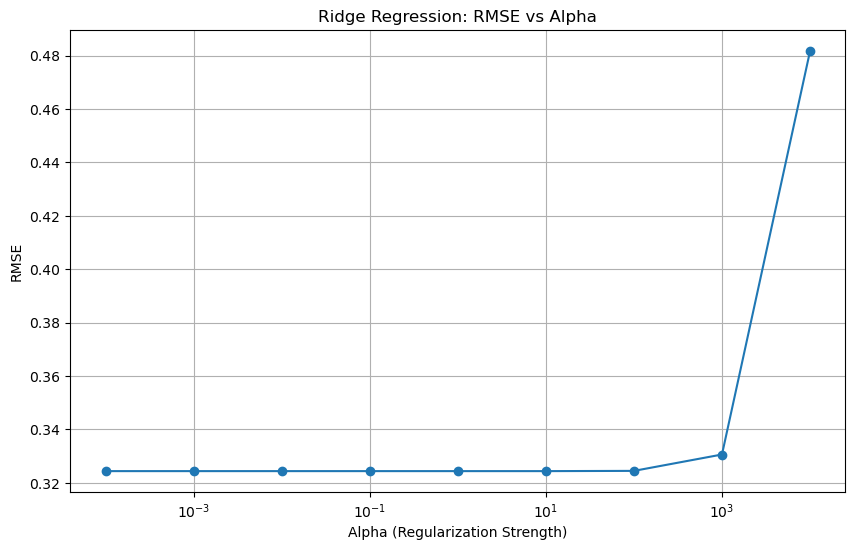

In [31]:
alphas = np.logspace(-4, 4, 9)

# Initialize lists to store RMSE values for each alpha
rmse_values = []

# Loop through each alpha value, train the model, and calculate RMSE
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)

# Plot the RMSE values for different alpha values
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, rmse_values, marker='o')
plt.title('Ridge Regression: RMSE vs Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('RMSE')
plt.grid()
plt.show()


# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# диапазон значений alpha
alphas = np.logspace(-3, 3, 7)

# параметры для GridSearchCV
param_grid = {'alpha': alphas}

# модель Lasso
lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5)  # cv - количество разбиений

grid_search.fit(X_train, y_train)
best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print("Best Alpha:", best_alpha)

# Оценка производительности на валидационных данных
y_pred_val = best_lasso_model.predict(X_val)
lasso_mae_val = mean_absolute_error(y_val, y_pred_val)
lasso_mse_val = mean_squared_error(y_val, y_pred_val)
lasso_rmse_val = np.sqrt(lasso_mse_val)

print("Lasso Regression - Validation Mean Absolute Error:", lasso_mae_val)
print("Lasso Regression - Validation Mean Squared Error:", lasso_mse_val)
print("Lasso Regression - Validation Root Mean Squared Error:", lasso_rmse_val)



Best Alpha: 0.001
Lasso Regression - Validation Mean Absolute Error: 0.23696606366239428
Lasso Regression - Validation Mean Squared Error: 0.10538547608575637
Lasso Regression - Validation Root Mean Squared Error: 0.3246312925239284


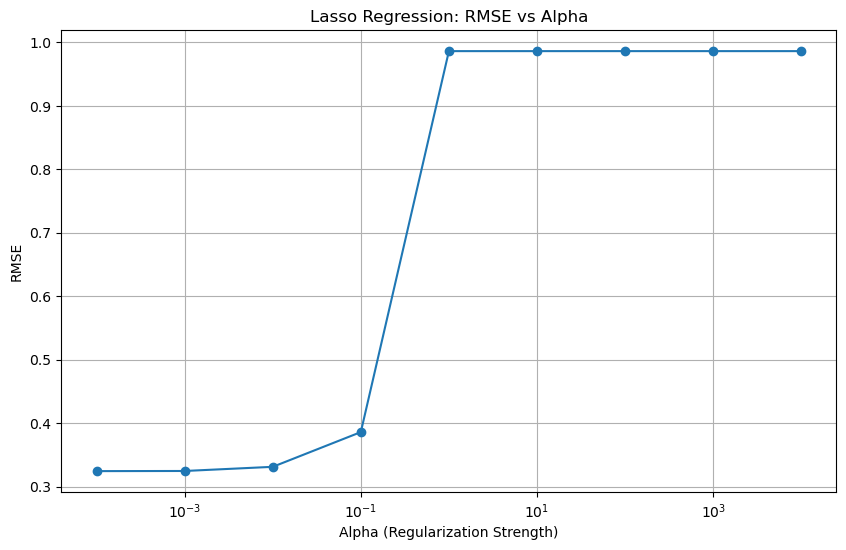

In [33]:
# Create a range of alpha values to test
alphas = np.logspace(-4, 4, 9)

# Initialize lists to store RMSE values for each alpha
rmse_values = []

# Loop through each alpha value, train the model, and calculate RMSE
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)

# Plot the RMSE values for different alpha values
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, rmse_values, marker='o')
plt.title('Lasso Regression: RMSE vs Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('RMSE')
plt.grid()
plt.show()


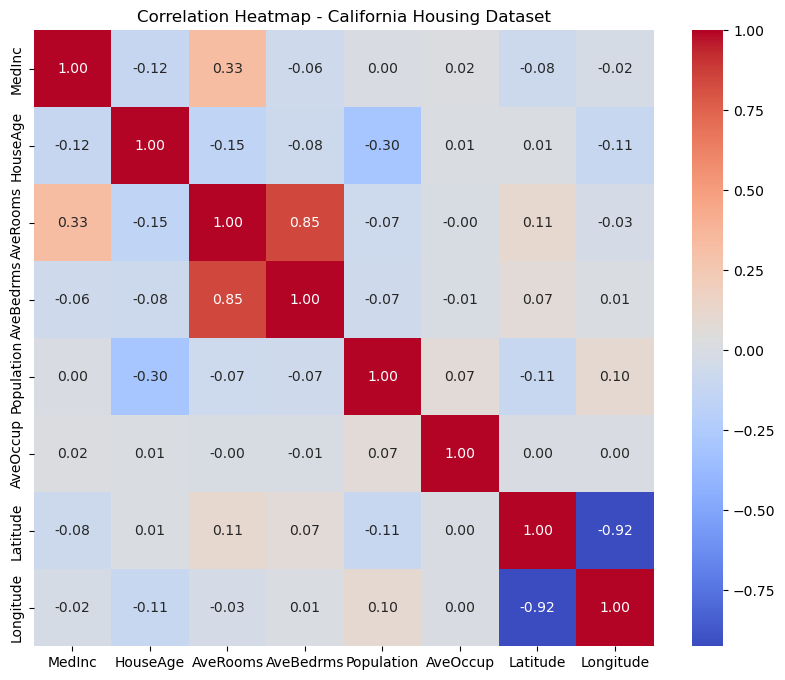

In [34]:
correlation_matrix = train_data.corr()

# Create a heatmap of the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - California Housing Dataset")
plt.show()

# Regression Trees

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# диапазоны значений гиперпараметров
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# модель DecisionTreeRegressor
tree = DecisionTreeRegressor()


grid_search = GridSearchCV(tree, param_grid, cv=5)  # cv - количество разбиений

#обучение модели
grid_search.fit(X_train, y_train)

# лучшуя модель и оптимальные гиперпараметры
best_tree_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Оцените лучшую модель
y_pred = best_tree_model.predict(X_val)
RT_mae = mean_absolute_error(y_val, y_pred)
RT_mse = mean_squared_error(y_val, y_pred)
RT_rmse = np.sqrt(RT_mse)

print("Decision Tree Regression - Mean Absolute Error:", RT_mae)
print("Decision Tree Regression - Mean Squared Error:", RT_mse)
print("Decision Tree Regression - Root Mean Squared Error:", RT_rmse)


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Regression - Mean Absolute Error: 0.25204455182277585
Decision Tree Regression - Mean Squared Error: 0.16155849338172942
Decision Tree Regression - Root Mean Squared Error: 0.4019433957433925


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\sk

# Bagging Trees

In [37]:
from sklearn.ensemble import BaggingRegressor

base_model = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_model, random_state=42)


param_grid = {
    'n_estimators': [5, 10, 20, 50],  # Разные значения количества базовых моделей
}

grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_bagging_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Bagging Model:", best_params)

y_pred = best_bagging_model.predict(X_val)
BT_mae = mean_absolute_error(y_val, y_pred)
BT_mse = mean_squared_error(y_val, y_pred)
BT_rmse = np.sqrt(BT_mse)

print("Mean Absolute Error:", BT_mae)
print("Mean Squared Error:", BT_mse)
print("Root Mean Squared Error:", BT_rmse)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Best Bagging Model: {'n_estimators': 50}
Mean Absolute Error: 0.12217086100316361
Mean Squared Error: 0.04432463579423478
Root Mean Squared Error: 0.21053416775961756


# Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred = random_forest_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.12127697017852462
Mean Squared Error: 0.043850220309661576
Root Mean Squared Error: 0.20940444195303398


In [46]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred = random_forest_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.11993126625513086
Mean Squared Error: 0.04439735034829521
Root Mean Squared Error: 0.21070678761799586
